#Estadísticas criminales de Bangladesh 2010-2019 - Jeferson Daniel Llanes Suarez

## Requisitos:

Su tarea es predecir la estación perteneciente, en función de ciertas cantidades de delitos incluidas en el conjunto de datos.


### Data Dictionary:

|Column Name |Data Type|Description|
|---|---|---|
|Dacoity	|Int	|Number of times Dacoity|
|Robbery|	Int	|Number of times Robbery|
|Murder	|Int	|Number of times Murder|
|Speedy Trial|	Int	|Number of times Speedy trial|
|Riot	|Int|Number of times Riot|
|Woman & Child Repression	|Int|Number of times Woman & Child Repression|
|Kidnapping	|Int|Number of times Kidnapping|
|Police Assault|	Int|Number of times Police Assault|
|Burglary	|Int|Number of times Burglary|
|Theft	|Int|Number of times Theft|
|Other Cases	|Int|Number of times Other Cases|
|Arms Act	|Int|Number of times Arm Acts|
|Explosive	|Int|Number of times Recovery of Explosive|
|Narcotics	|Int|Number of times Recovery of Narcotics|
|Smuggling	|Int|Number of times Recovery of Smuggling|
|Total Cases	|Int|Number total of Cases|


### Requisito de envío:
Todo su código utilizado para limpieza de datos, EDA y modelado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Algunas importaciones sobran 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
from re import sub
import plotly.express as px
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv('/content/Crime Statistics Of Bangladesh 2010-2019.csv')

In [ ]:
df.head()

,Unit Name,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total Cases
0,DMP,2010,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,23519
1,CMP,2010,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,4063
2,KMP,2010,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,1767
3,RMP,2010,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,1571
4,BMP,2010,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,1139


In [ ]:
df.describe()

,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total Cases
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2014.500000,26.072222,45.611111,201.850000,75.911111,4.333333,972.783333,37.522222,34.722222,132.861111,368.672222,4264.494444,95.344444,28.833333,2817.294444,295.555556,9401.861111
std,2.880293,40.517605,60.305589,293.601761,112.382740,8.263807,1324.042731,50.667991,52.540706,181.954558,515.365779,5641.395295,142.875667,55.691840,4194.012161,541.533218,11774.257629
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,3.000000,15.000000,2.000000,0.000000,11.750000,1.000000,1.000000,2.000000,30.000000,129.500000,3.000000,0.000000,177.500000,2.000000,717.500000
50%,2014.500000,6.000000,19.500000,37.000000,21.500000,0.000000,167.000000,12.000000,14.000000,49.000000,116.500000,735.000000,22.500000,4.000000,807.000000,52.500000,1983.500000
75%,2017.000000,36.000000,62.250000,278.000000,107.750000,5.000000,1640.500000,54.250000,40.250000,155.250000,477.000000,7003.500000,138.500000,27.250000,3496.250000,201.250000,18547.000000
max,2019.000000,184.000000,294.000000,1395.000000,563.000000,56.000000,5115.000000,204.000000,336.000000,686.000000,2240.000000,22429.000000,723.000000,387.000000,22682.000000,2509.000000,44536.000000


Limpieza del dataset, reemplazando 0 por el valor de la mediana

In [ ]:
clean=['Dacoity','Robbery','Murder','Speedy Trial','Riot','Woman & Child Repression','Kidnapping','Police Assault','Burglary','Theft','Other Cases','Arms Act','Explosive','Narcotics','Smuggling']
for i in df[clean]:
    df.loc[:,i].replace(0, df.loc[:,i].median(), inplace=True)

In [ ]:
df.describe()

,Year,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total Cases
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2014.500000,27.638889,49.619444,209.044444,80.569444,4.333333,1005.255556,40.322222,37.911111,143.477778,390.677778,4403.327778,99.969444,30.166667,2969.727778,306.930556,9401.861111
std,2.880293,39.579178,57.719277,288.958481,109.533480,8.263807,1301.519173,48.804210,50.719878,175.158203,501.374696,5542.368446,140.034734,55.025794,4101.996553,535.693181,11774.257629
min,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.000000,1.000000,1.000000,44.000000,1.000000,0.000000
25%,2012.000000,6.000000,15.000000,31.750000,19.000000,0.000000,147.000000,11.000000,13.000000,43.500000,94.250000,572.750000,18.000000,4.000000,555.500000,35.750000,717.500000
50%,2014.500000,6.000000,19.750000,37.000000,21.750000,0.000000,168.000000,12.000000,14.000000,49.000000,116.750000,737.000000,22.750000,4.000000,810.000000,54.250000,1983.500000
75%,2017.000000,36.000000,62.250000,278.000000,107.750000,5.000000,1640.500000,54.250000,40.250000,155.250000,477.000000,7003.500000,138.500000,27.250000,3496.250000,201.250000,18547.000000
max,2019.000000,184.000000,294.000000,1395.000000,563.000000,56.000000,5115.000000,204.000000,336.000000,686.000000,2240.000000,22429.000000,723.000000,387.000000,22682.000000,2509.000000,44536.000000


In [ ]:
#Separo todos los datos con las características y las etiquetas o resultados
X = np.array(df.drop(['Unit Name'], 1))
y = np.array(df['Unit Name'])

<ipython-input-8-770a98cfe758>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Unit Name'], 1))


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 144 datos para entrenamiento y 36 datos para prueba


Modelo Regresion Logistica 65% - 70 %

In [ ]:
#Modelo de Regresión Logística
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Regresión Logística: 0.7013888888888888


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo SVC 31% - No recomendable - 42%

In [ ]:
#Modelo de Máquinas de Vectores de Soporte
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Máquinas de Vectores de Soporte: 0.4236111111111111


Modelo KNeighbors 64% - 67 %

In [ ]:
#Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.6736111111111112


**ESTE ES EL ALGORITMO MÁS CERCANO**

Modelo Árboles de decisión 88% - 89%
Recomendado para este tipo de problemas de clasificación

In [ ]:
#Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 0.8958333333333334


Correlación de las variables

<AxesSubplot:>

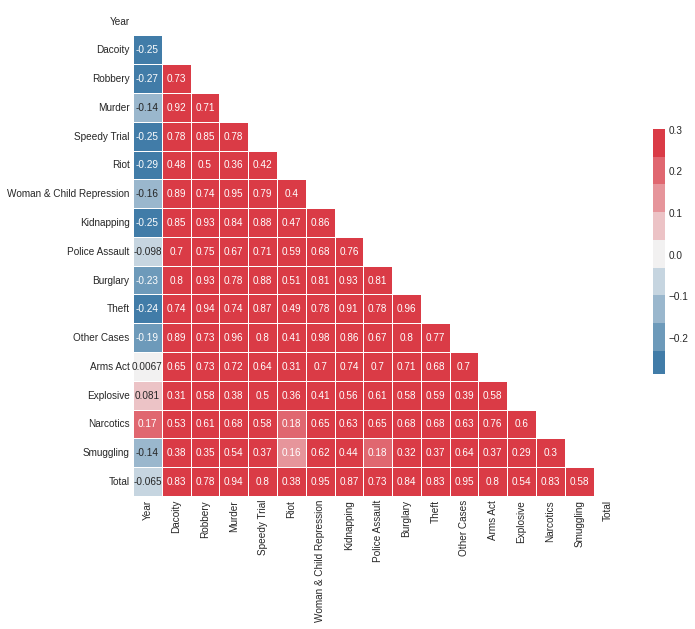

In [ ]:
correlation= df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(correlation, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Figure** Crimenes por Estación

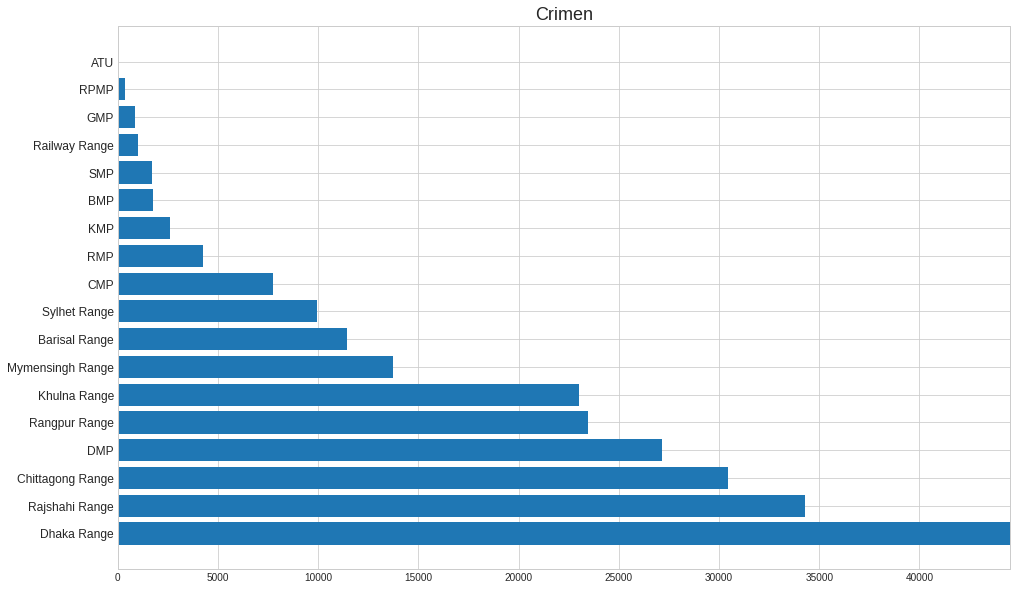

In [ ]:
crimenes = df[['Unit', 'Total']].sort_values('Total', ascending=False)

plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(16, 10))

plt.barh(crimenes.Unit, crimenes.Total)

plt.xlim(crimenes['Total'].min(), crimenes['Total'].max())

plt.yticks(fontsize=12)

plt.title('Crimen', fontsize=18)

plt.show()